#### evaluate the prediction performance of the trained model

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix
 [[226  27]
 [ 46 252]]
accuracy:0.867513611615245
precision:0.9032258064516129
recall:0.8456375838926175
f1-score:0.8734835355285963


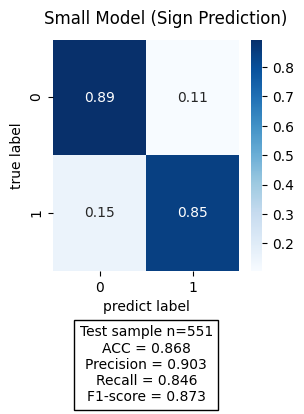

In [2]:
# load datasets
y_true = np.load('../model/pred_results/small/label.npy')
y_pred = np.load('../model/pred_results/small/predict.npy')

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
sns.heatmap(new_obj, fmt='.2f', cmap='Blues', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.suptitle('Small Model (Sign Prediction)')
# calculate sample size
sample_size = len(test_label)
plt.title('Test sample n=%d\nACC = %.3f\nPrecision = %.3f\nRecall = %.3f\nF1-score = %.3f'%(sample_size,accuracy_score(test_label, y_score),precision_score(test_label, y_score)
            ,recall_score(test_label, y_score),f1_score(test_label, y_score)), fontsize=10,y=-0.6,color='#000000',bbox=dict(ec='#000000',fc ='w'))
plt.savefig('images/performance/cm-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.9154087107749975


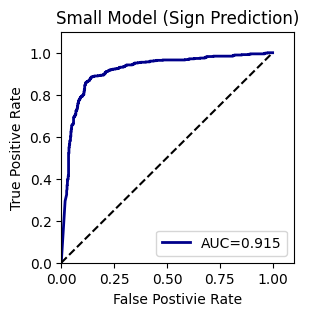

In [3]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc = auc(fpr, tpr)
print("AUC : ", auc)
ax = plt.subplots(figsize=(3,3))
plt.title('Small Model (Sign Prediction)')
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % (auc),color='#00008B')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/performance/auc-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

confusion_matrix
 [[281  57]
 [ 77 281]]
accuracy:0.8074712643678161
precision:0.8313609467455622
recall:0.7849162011173184
f1-score:0.807471264367816


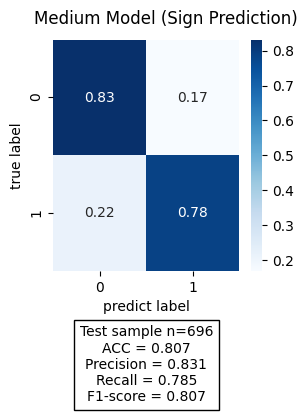

In [4]:
# load datasets
y_true = np.load('../model/pred_results/middle/label.npy')
y_pred = np.load('../model/pred_results/middle/predict.npy')

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
plt.suptitle('Medium Model (Sign Prediction)')
# calculate sample size
sample_size = len(test_label)
plt.title('Test sample n=%d\nACC = %.3f\nPrecision = %.3f\nRecall = %.3f\nF1-score = %.3f'%(sample_size,accuracy_score(test_label, y_score),precision_score(test_label, y_score)
            ,recall_score(test_label, y_score),f1_score(test_label, y_score)), fontsize=10,y=-0.6,color='#000000',bbox=dict(ec='#000000',fc ='w'))
sns.heatmap(new_obj, fmt='.2f', cmap='Blues', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.savefig('images/performance/cm-middle.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.8642664569295812


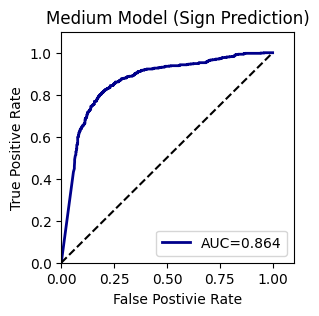

In [5]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc = auc(fpr, tpr)
print("AUC : ", auc)
ax = plt.subplots(figsize=(3,3))
plt.title('Medium Model (Sign Prediction)')
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % auc,color='#00008B')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/performance/auc-middle.png',dpi=300, bbox_inches = 'tight')
plt.show()

confusion_matrix
 [[238 203]
 [110 392]]
accuracy:0.6680805938494168
precision:0.6588235294117647
recall:0.7808764940239044
f1-score:0.714676390154968


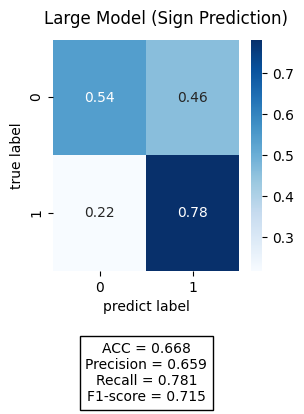

In [6]:
# load datasets
y_true = np.load('../model/pred_results/large/label.npy')
y_pred = np.load('../model/pred_results/large/predict.npy')

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
plt.suptitle('Large Model (Sign Prediction)')
plt.title('ACC = %.3f\nPrecision = %.3f\nRecall = %.3f\nF1-score = %.3f'%(accuracy_score(test_label, y_score),precision_score(test_label, y_score)
            ,recall_score(test_label, y_score),f1_score(test_label, y_score)), fontsize=10,y=-0.6,color='#000000',bbox=dict(ec='#000000',fc ='w'))
sns.heatmap(new_obj, fmt='.2f', cmap='Blues', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.savefig('images/performance/cm-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.7282392220851526


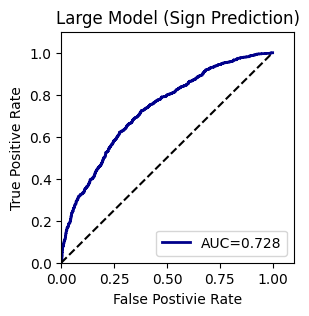

In [7]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc = auc(fpr, tpr)
print("AUC : ", auc)
ax = plt.subplots(figsize=(3,3))
plt.title('Large Model (Sign Prediction)')
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % (auc),color='#00008B')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/performance/auc-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

confusion_matrix
 [[ 51  35]
 [ 54 106]]
accuracy:0.6382113821138211
precision:0.75177304964539
recall:0.6625
f1-score:0.7043189368770764


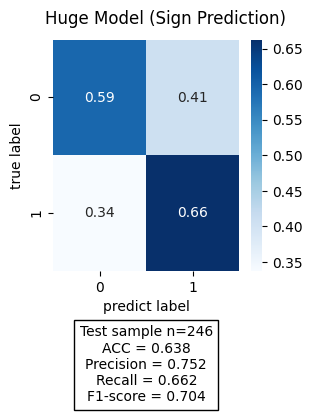

In [8]:
# load datasets
y_true = np.load('../model/pred_results/huge/label.npy')
y_pred = np.load('../model/pred_results/huge/predict.npy')

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
plt.suptitle('Huge Model (Sign Prediction)')
# calculate sample size
sample_size = len(test_label)
plt.title('Test sample n=%d\nACC = %.3f\nPrecision = %.3f\nRecall = %.3f\nF1-score = %.3f'%(sample_size,accuracy_score(test_label, y_score),precision_score(test_label, y_score)
            ,recall_score(test_label, y_score),f1_score(test_label, y_score)), fontsize=10,y=-0.6,color='#000000',bbox=dict(ec='#000000',fc ='w'))
sns.heatmap(new_obj, fmt='.2f', cmap='Blues', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.savefig('images/performance/cm-huge.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.7010212175292485


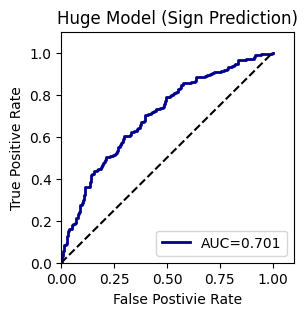

In [9]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc = auc(fpr, tpr)
print("AUC : ", auc)
ax = plt.subplots(figsize=(3,3))
plt.title('Huge Model (Sign Prediction)')
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % (auc),color='#00008B')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/performance/auc-huge.png',dpi=300, bbox_inches = 'tight')
plt.show()

In [10]:
# convert and save plot data
import numpy as np
import pandas as pd
import os

output_dir = 'plot_data'
os.makedirs(output_dir, exist_ok=True)

model_sizes = ['small', 'middle', 'large', 'huge']
output_file = os.path.join(output_dir, 'Figure2a_2b_plot_data.xlsx')


with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    for size in model_sizes:
        
        y_true = np.load(f'../model/pred_results/{size}/label.npy')
        y_pred = np.load(f'../model/pred_results/{size}/predict.npy')
        
        df_true = pd.DataFrame(y_true)
        df_pred = pd.DataFrame(y_pred)
        
        df_true.to_excel(writer, sheet_name=f'{size}_label', index=False)
        df_pred.to_excel(writer, sheet_name=f'{size}_predict', index=False)